# 2018/2019 - Task List 1

1. Generate random variable from prefered dystribution using Pyro (pyro.sample)
    
    - animate how distribution of values changes
    - animate histograms of values
    - start with empty list of values, generate new samples, generate histogram
    
    
2. Write a simulator (and exact solution utilizing Bayes theorem) for chances to be ill on a certain disease. We know that it affects from about 1 to 100 out of 50,000 people. There was developed a test to check whether the person has the disease and it is quite accurate: the probability that the test result is positive (suggesting the person has the disease), given that the person does not have the disease, is only 2 percent; the probability that the test result is negative (suggesting the person does not have the disease), given that the person has the disease, is only 1 percent. When a random person gets tested for the disease and the result comes back positive, what is the probability that the person has the disease? Check whole parameter space and visualise results.

    - it must be a simulator!
    - sample from distribution using given probabilities
    - repeate experiment and compare with Bayes equation


## Required imports

In [249]:
%matplotlib inline
import pyro
import torch
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import animation, rc
from IPython.display import HTML

## Generating single value from normal distribution with given mean and variance

In [250]:
mean = 0
variance = 10
x = pyro.sample("normal_sampling", pyro.distributions.Normal(mean, variance))
print(x)

tensor(4.6483)


## Sampling from categorical probabilities with given probabilities

In [251]:
x = pyro.sample("categorical_sampling", pyro.distributions.Categorical(logits = torch.tensor([0.5, 0.5])))
print(x)

tensor(1)


## Animating data

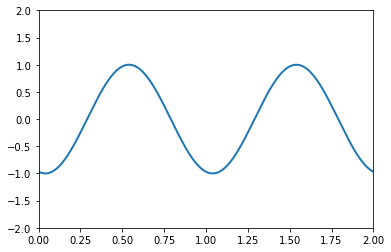

In [263]:
def animate():
    # First set up the figure, the axis, and the plot element we want to animate
    fig, ax = plt.subplots()

    ax.set_xlim(( 0, 2))
    ax.set_ylim((-2, 2))

    line, = ax.plot([], [], lw=2)
    
    # animation function. This is called sequentially
    def sin(i):
        x = np.linspace(0, 2, 1000)
        y = np.sin(2 * np.pi * (x - 0.01 * i))
        line.set_data(x, y)
        return (line,)

    # initialization function: plot the background of each frame
    def init():
        line.set_data([], [])
        return (line,)
    # call the animator. blit=True means only re-draw the parts that have changed.
    anim = animation.FuncAnimation(fig, sin, init_func=init,
                                   frames=30, interval=50, blit=True)
    return HTML(anim.to_jshtml())

animate()

## Drawing histogram

Text(0.5,0,'Value classes')

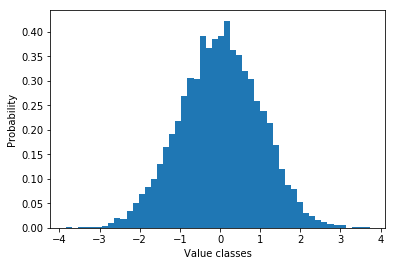

In [252]:
x = np.random.normal(size = 10000)
plt.hist(x, density=True, bins=50)
plt.ylabel('Probability');
plt.xlabel('Value classes')

## Task 1

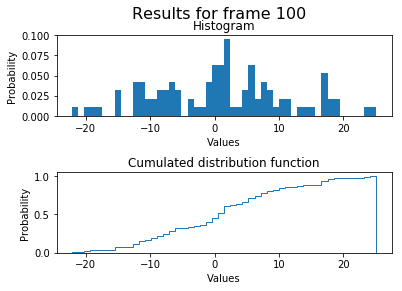

In [307]:
BINS=50;
FRAMES=100;
INTERVAL=100;

def customDistribution():
    return pyro.sample("custom_categorical", pyro.distributions.Categorical(probs = torch.tensor([0.1,0.9])))

def normalDistribution():
    mean = 0
    variance = 10
    return pyro.sample("normal_sampling", pyro.distributions.Normal(mean, variance))

def nextSample():
#     return customDistribution()
    return normalDistribution()

def animate():
    samples = []
    
    fig, (ax1, ax2) = plt.subplots(2)
    
    fig.subplots_adjust(hspace=0.7)
    
    def setTitles(num):
        fig.suptitle(f'Results for frame {num+1}', fontsize=16)
        ax1.set_title('Histogram')
        ax1.set_xlabel('Values')
        ax1.set_ylabel('Probability')
        ax2.set_title('Cumulated distribution function')
        ax2.set_xlabel('Values')
        ax2.set_ylabel('Probability')
    

    def update_functions(num, samples):
        samples+=[nextSample()]
        ax1.cla()
        ax2.cla()
        setTitles(num)
        ax1.hist(samples, density=True, bins=BINS)
        ax2.hist(samples, density=True, histtype='step',
                           cumulative=True, bins=BINS_COUNT) 
    def init():
        return

    anim = animation.FuncAnimation(fig, update_functions, init_func=init, frames=FRAMES,interval=INTERVAL, fargs=(samples, ) )
    
    return HTML(anim.to_jshtml())

animate()

## Task 2

Loading 10%
Loading 20%
Loading 30%
Loading 40%
Loading 50%
Loading 60%
Loading 70%
Loading 80%
Loading 90%
Loading 100%


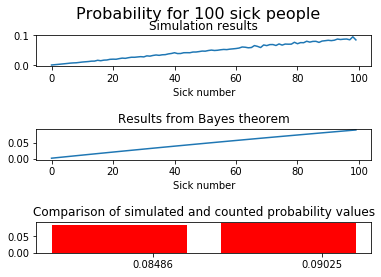

In [305]:
# The parameter is number of sick people in the population
#constants
MAX_SICK_COUNT=100
POPULATION=50000
P_NEGATIVE_SICK=0.01 #probability of negative test given that person was sick
P_POSITIVE_HEALTHY=0.02
#simulation parameters
INTERVAL=100


#SIMULATION
def simulation(sick_count):

    p_sick=sick_count/POPULATION
    p_healthy=1-p_sick
    p_positive_sick=1-P_NEGATIVE_SICK
    
    def getSampleFromPopulation(i):
#         return pyro.sample("categorical_sampling_from_population", pyro.distributions.Categorical(probs = torch.tensor([p_sick,p_healthy])))
        return 0 if i<sick_count else 1

    def performTestForSample(sample):
        if sample==0:#sick
            return pyro.sample("categorical_sampling_sick_case", pyro.distributions.Categorical(probs = torch.tensor([p_positive_sick,P_NEGATIVE_SICK])))
        else:#healthy
            return pyro.sample("categorical_sampling_healthy_case", pyro.distributions.Categorical(probs = torch.tensor([P_POSITIVE_HEALTHY,1-P_POSITIVE_HEALTHY])))

    def estimateTest(sample,testResult,positive_counter,positive_sick_counter):
        if sample==0 and testResult==0:
            positive_counter+=1
            positive_sick_counter+=1
        if sample==1 and testResult==0:
            positive_counter+=1
        return positive_counter,positive_sick_counter
    
    def countFinalProbability(positive_counter,positive_sick_counter):
        return positive_sick_counter/positive_counter
    
    def performSimulation():
        sick_counter=0;
        positive_counter=0;
        positive_sick_counter=0;
        for i in range(POPULATION):
            sample=getSampleFromPopulation(i)
            if sample==0:
                sick_counter+=1;
            testResult=performTestForSample(sample)
            positive_counter,positive_sick_counter=estimateTest(sample,testResult,positive_counter,positive_sick_counter)
        return countFinalProbability(positive_counter,positive_sick_counter)

#COUNTED FROM BAYES THEOREM
    def countFromBayesTheorm():
        p_positive=p_sick*p_positive_sick+p_healthy*P_POSITIVE_HEALTHY
        p_sick_positive=(p_positive_sick*p_sick)/p_positive
        return p_sick_positive
    
    return performSimulation(),countFromBayesTheorm()

#ANIMATION
def animate():
    simulation_samples = []
    counted_samples = []
    
    fig, (ax1, ax2,ax3) = plt.subplots(3)
    fig.subplots_adjust(hspace=2)
    
    def setTitles(num,sim,cnt):
        fig.suptitle(f'Probability for {num+1} sick people', fontsize=16)
        ax1.set_title('Simulation results')
        ax1.set_xlabel('Sick number')
        ax2.set_title('Results from Bayes theorem')
        ax2.set_xlabel('Sick number')
        ax3.set_title('Comparison of simulated and counted probability values')
        ax3.set_xticks(np.arange(2) + 0.2)
        ax3.set_xticklabels(("%.5f" %sim,"%.5f" %cnt ))
        

    def update_functions(num, sim_samples,cnt_samples):
        if(num%10==0):
            print(f'Loading {num+10}%')
        simulated,counted=simulation(num+1)
        sim_samples+=[simulated]
        cnt_samples+=[counted]
        ax1.cla()
        ax2.cla()
        ax3.cla()
        setTitles(num,simulated,counted)
        ax1.plot(sim_samples)
        ax2.plot(cnt_samples)
        ax3.bar([0,1],[simulated,counted],color='r')
    
    def init():
        return

    anim = animation.FuncAnimation(fig, update_functions, init_func=init, frames=MAX_SICK_COUNT,interval=INTERVAL, fargs=(simulation_samples,counted_samples) )
    
    return HTML(anim.to_jshtml())

animate()
